<a href="https://colab.research.google.com/github/Sufyanmd/HealthRisk-Premium-Estimator/blob/main/analysis_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/content/insurance.csv")

In [6]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [8]:
df.shape

(1340, 10)

In [9]:
pd.set_option("display.float_format","{:,.2f}".format)

In [10]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.20,91,Yes,0,No,southeast,"1,121.87"
1,2,24.00,male,30.10,87,No,0,No,southeast,"1,131.51"
2,3,NaN,male,33.30,82,Yes,0,No,southeast,"1,135.94"
3,4,NaN,male,33.70,80,No,0,No,northwest,"1,136.40"
4,5,NaN,male,34.10,100,No,0,No,northwest,"1,137.01"
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,"55,135.40"
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,"58,571.07"
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,"60,021.40"
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,"62,592.87"


In [11]:
sns.set(style="whitegrid",palette="Set2",font_scale=1.1)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.isna().sum()

,0
Id,0
age,5
gender,0
bmi,0
bloodpressure,0
diabetic,0
children,0
smoker,0
region,3
claim,0


In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(1332, 10)

In [19]:
df.isna().sum().sum()

np.int64(0)

In [20]:
df.describe()

,Id,age,bmi,bloodpressure,children,claim
count,"1,332.00","1,332.00","1,332.00","1,332.00","1,332.00","1,332.00"
mean,674.47,38.09,30.66,94.19,1.10,"13,325.25"
std,384.70,11.11,6.12,11.45,1.21,"12,109.62"
min,1.00,18.00,16.00,80.00,0.00,"1,121.87"
25%,341.75,29.00,26.20,86.00,0.00,"4,760.16"
50%,674.50,38.00,30.35,92.00,1.00,"9,412.97"
75%,"1,007.25",47.00,34.73,99.00,2.00,"16,781.33"
max,"1,340.00",60.00,53.10,140.00,5.00,"63,770.43"


In [21]:
df.describe(include = "all")

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,"1,332.00","1,332.00",1332,"1,332.00","1,332.00",1332,"1,332.00",1332,1332,"1,332.00"
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.47,38.09,NaN,30.66,94.19,NaN,1.10,NaN,NaN,"13,325.25"
std,384.70,11.11,NaN,6.12,11.45,NaN,1.21,NaN,NaN,"12,109.62"
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,"1,121.87"
25%,341.75,29.00,NaN,26.20,86.00,NaN,0.00,NaN,NaN,"4,760.16"
50%,674.50,38.00,NaN,30.35,92.00,NaN,1.00,NaN,NaN,"9,412.97"
75%,"1,007.25",47.00,NaN,34.73,99.00,NaN,2.00,NaN,NaN,"16,781.33"


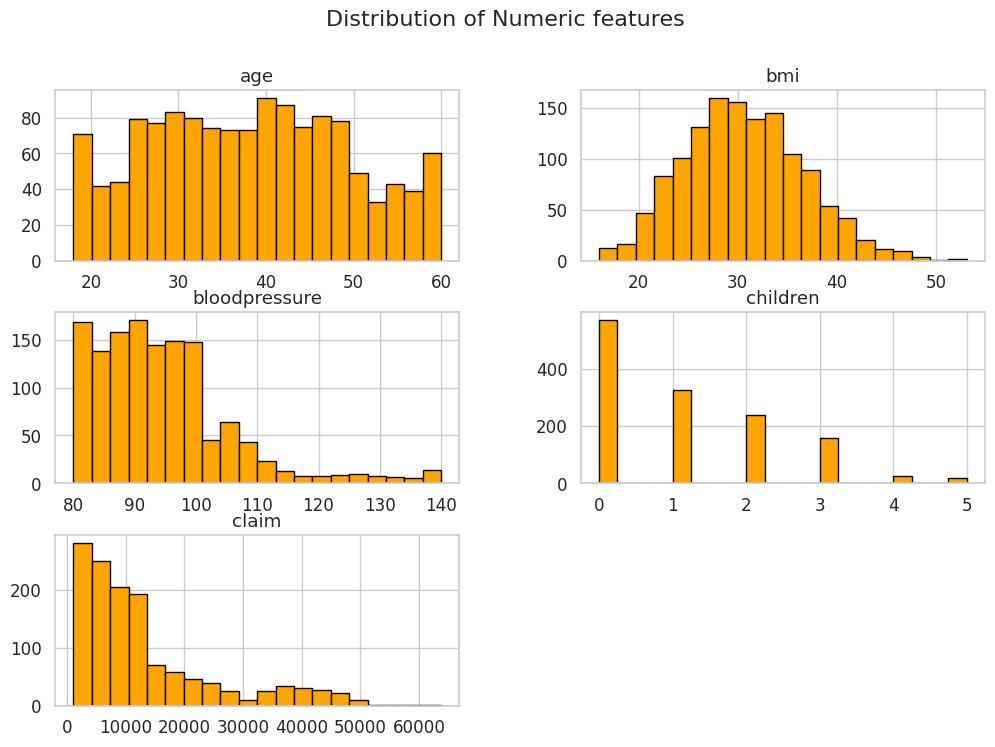

In [24]:
numeric_cols = ["age", "bmi", "bloodpressure", "children", "claim"]
df[numeric_cols].hist(bins=20, figsize=(12,8), color="orange", edgecolor = "black")
plt.suptitle("Distribution of Numeric features", fontsize = 16)
plt.show()

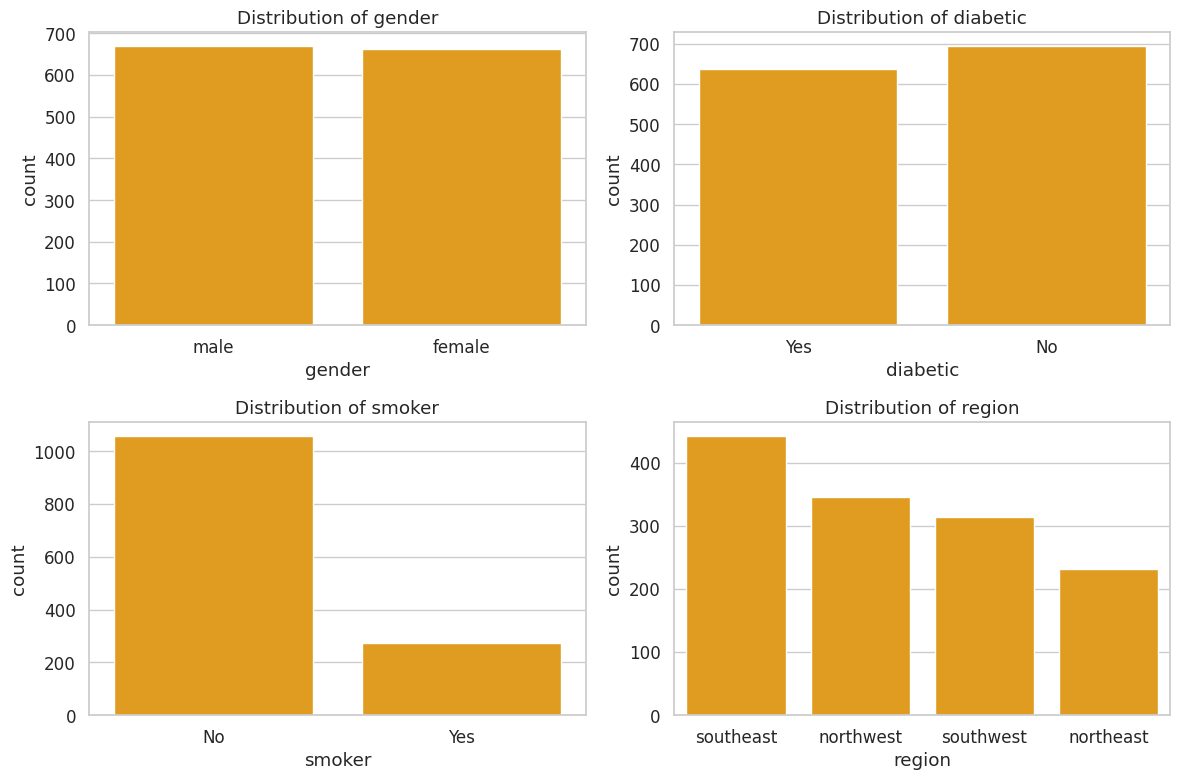

In [28]:
cat_col = ["gender","diabetic", "smoker", "region"]
plt.figure(figsize=(12,8))

for i, col in enumerate(cat_col,1):
  plt.subplot(2,2,i)
  sns.countplot(data = df, x = col, color = "orange")
  plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [29]:
df.groupby(["gender", "smoker"])["claim"].mean().round(2)

gender  smoker
female  No        8,762.30
        Yes      30,679.00
male    No        8,169.25
        Yes      33,042.01
Name: claim, dtype: float64

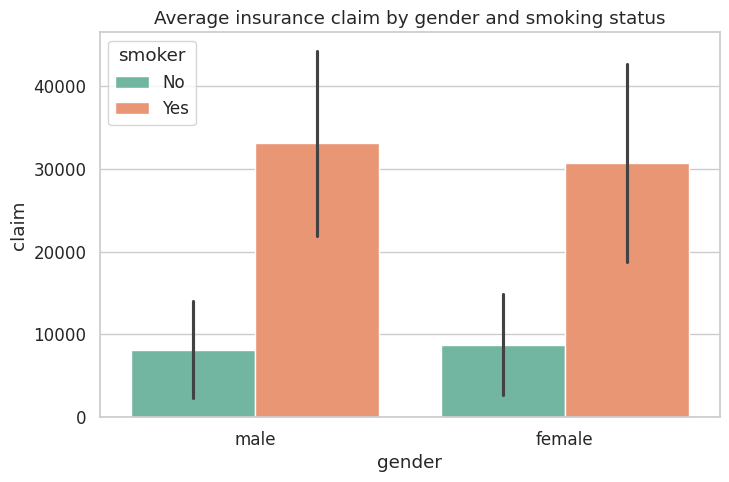

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="gender", y="claim", hue="smoker", estimator="mean", errorbar="sd")
plt.title("Average insurance claim by gender and smoking status")
plt.show()

In [33]:
pivot_region_diabetic = df.groupby(["region", "diabetic"])["claim"].mean().unstack()

In [34]:
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,"16,966.86","16,818.30"
northwest,"11,442.83","12,224.96"
southeast,"13,578.72","12,574.09"
southwest,"13,069.91","12,313.74"


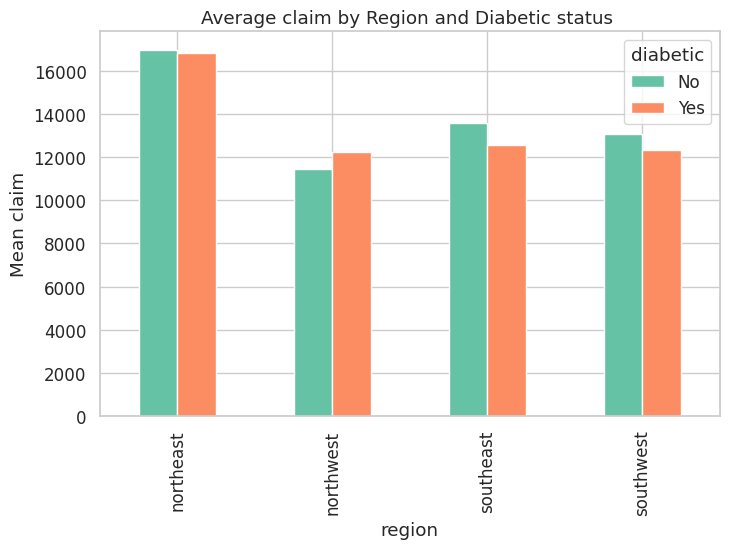

In [37]:
pivot_region_diabetic.plot(kind = "bar", figsize = (8,5))
plt.title("Average claim by Region and Diabetic status ")
plt.ylabel("Mean claim")
plt.show()

In [39]:
pivot_table = pd.pivot_table(df, values = "claim", index = "region", columns="smoker", aggfunc="mean")
pivot_table

smoker,No,Yes
region,,
northeast,"11,666.11","29,673.54"
northwest,"8,076.20","30,192.00"
southeast,"7,444.14","34,845.00"
southwest,"8,294.75","32,269.06"


In [40]:
pivot_table = pd.pivot_table(df, values = "claim", index = "children", columns="diabetic", aggfunc="mean")
pivot_table

diabetic,No,Yes
children,,
0,"12,967.40","11,985.29"
1,"12,730.46","12,732.06"
2,"15,567.77","14,579.36"
3,"13,807.61","17,091.26"
4,"14,106.63","13,573.35"
5,"8,519.04","9,205.59"


In [41]:
numeric_cols

['age', 'bmi', 'bloodpressure', 'children', 'claim']

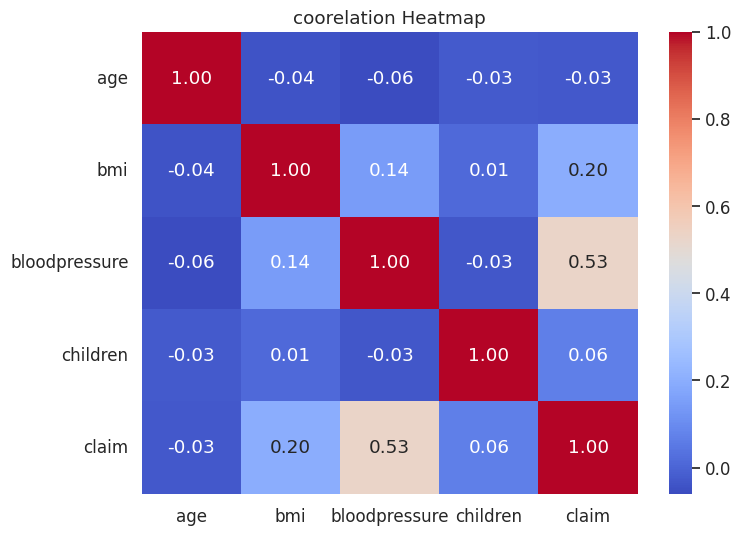

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("coorelation Heatmap")
plt.show()

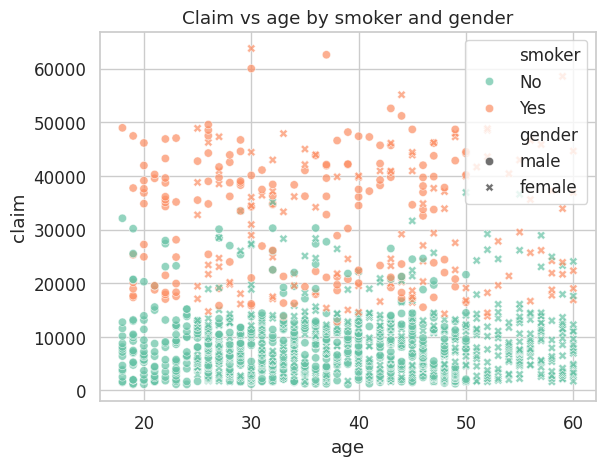

In [45]:
sns.scatterplot(data = df, x = "age", y = "claim", hue = "smoker", style = "gender", alpha = 0.7)
plt.title("Claim vs age by smoker and gender")
plt.show()

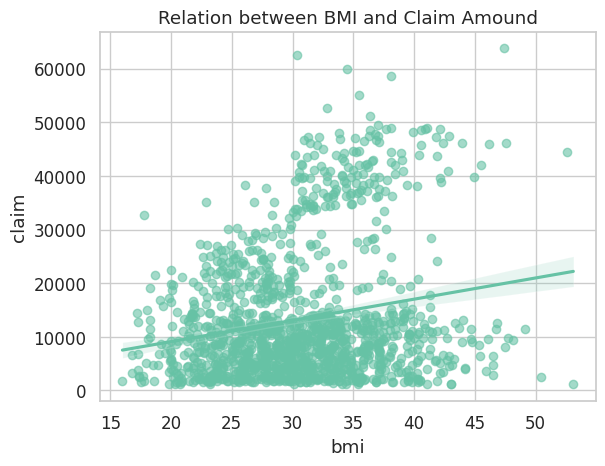

In [46]:
sns.regplot(data = df, x = "bmi", y = "claim", scatter_kws={"alpha":0.6})
plt.title("Relation between BMI and Claim Amound")
plt.show()

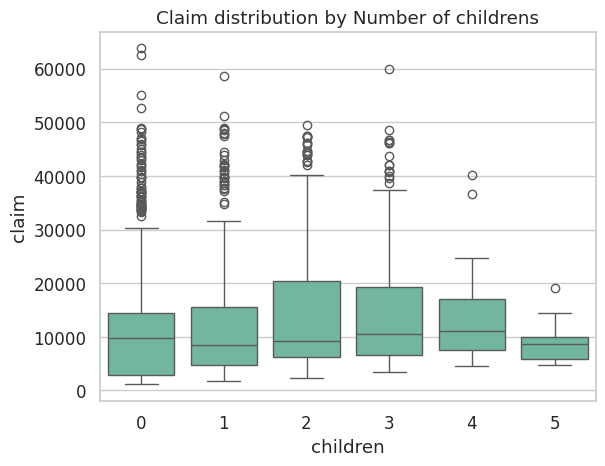

In [47]:
sns.boxplot(data = df, x="children", y="claim")
plt.title("Claim distribution by Number of childrens")
plt.show()

In [48]:
df["age_groups"] = pd.cut(df["age"], bins = [0,18,30,45,60,100], labels=["<18", "18-30", "31-45", "46-60", "60+"])

In [49]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_groups
0,1,39.00,male,23.20,91,Yes,0,No,southeast,"1,121.87",31-45
1,2,24.00,male,30.10,87,No,0,No,southeast,"1,131.51",18-30
7,8,19.00,male,41.10,100,No,0,No,northwest,"1,146.80",18-30
8,9,20.00,male,43.00,86,No,0,No,northwest,"1,149.40",18-30
9,10,30.00,male,53.10,97,No,0,No,northwest,"1,163.46",18-30
...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,"55,135.40",31-45
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,"58,571.07",46-60
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,"60,021.40",18-30
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,"62,592.87",31-45


In [52]:
df["age_groups"].value_counts()

,count
age_groups,
31-45,553
46-60,383
18-30,380
<18,16
60+,0


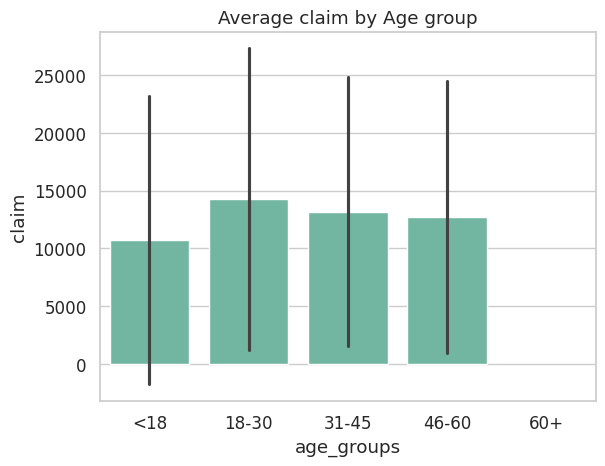

In [54]:
sns.barplot(data = df, x = "age_groups", y = "claim", estimator="mean", errorbar = "sd")
plt.title("Average claim by Age group")
plt.show()

In [56]:
from prompt_toolkit.shortcuts.progress_bar.formatters import Label
df["bmi_category"] = pd.cut(df["bmi"], bins = [0, 18.5, 24.9, 29.9, 100], labels= ["UnderWeight", "Normal", "OverWeight", "Obese"])

In [57]:
df["bmi_category"].value_counts()

,count
bmi_category,
Obese,702
OverWeight,387
Normal,222
UnderWeight,21


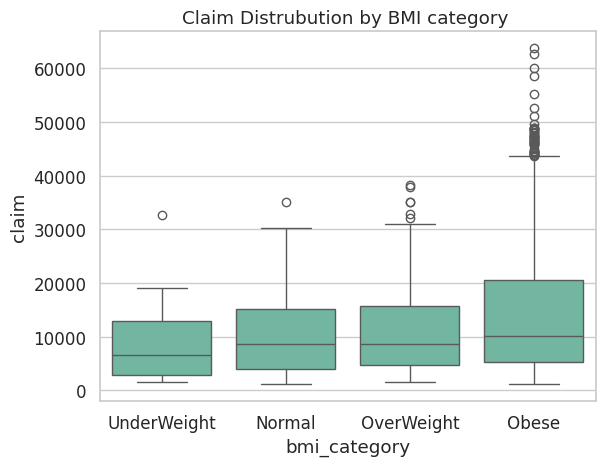

In [59]:
sns.boxplot(data = df, x="bmi_category", y="claim")
plt.title("Claim Distrubution by BMI category ")
plt.show()

In [62]:
region_status = df.groupby("region").agg(
    smokers_rate = ("smoker", lambda x: (x=="Yes").mean() * 100),
    mean_claim = ("claim", "mean")
).reset_index()

In [63]:
region_status

,region,smokers_rate,mean_claim
0,northeast,29.00,"16,889.04"
1,northwest,16.81,"11,794.22"
2,southeast,20.59,"13,085.50"
3,southwest,18.47,"12,723.13"


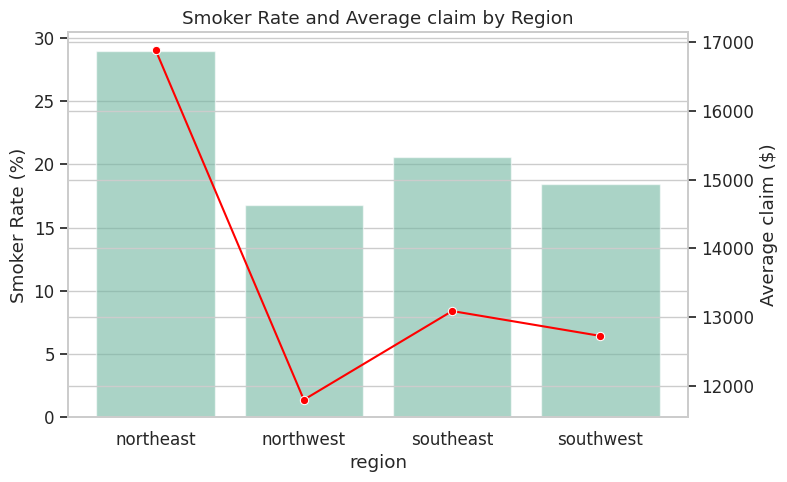

In [66]:
fig, ax1 = plt.subplots(figsize=(8,5))
sns.barplot(data=region_status, x="region", y="smokers_rate", ax = ax1, alpha=0.6)
ax2 = ax1.twinx()
sns.lineplot(data=region_status, x="region", y="mean_claim", ax = ax2, color="red", marker = "o")

ax1.set_ylabel("Smoker Rate (%)")
ax2.set_ylabel("Average claim ($)")
plt.title("Smoker Rate and Average claim by Region")
plt.show()


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

In [68]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_groups', 'bmi_category'],
      dtype='object')

In [69]:
X = df[["age", "gender", "bmi", "bloodpressure", "diabetic", "children", "smoker"]]
Y = df[["claim"]]

In [70]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,male,23.20,91,Yes,0,No
1,24.00,male,30.10,87,No,0,No
7,19.00,male,41.10,100,No,0,No
8,20.00,male,43.00,86,No,0,No
9,30.00,male,53.10,97,No,0,No
...,...,...,...,...,...,...,...
1335,44.00,female,35.50,88,Yes,0,Yes
1336,59.00,female,38.10,120,No,1,Yes
1337,30.00,male,34.50,91,Yes,3,Yes
1338,37.00,male,30.40,106,No,0,Yes


In [78]:
cat_cols = ["gender", "diabetic", "smoker"]
label_encoders = {}

In [79]:
for col in cat_cols:
  le = LabelEncoder()
  X[col] = le.fit_transform(X[col])
  label_encoders[col] = le

  joblib.dump(le, f"label_encoder_{col}.pkl")

/tmp/ipython-input-3064986268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-3064986268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-3064986268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [80]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,1,23.20,91,1,0,0
1,24.00,1,30.10,87,0,0,0
7,19.00,1,41.10,100,0,0,0
8,20.00,1,43.00,86,0,0,0
9,30.00,1,53.10,97,0,0,0
...,...,...,...,...,...,...,...
1335,44.00,0,35.50,88,1,0,1
1336,59.00,0,38.10,120,0,1,1
1337,30.00,1,34.50,91,1,3,1
1338,37.00,1,30.40,106,0,0,1


In [81]:
label_encoders

{'gender': LabelEncoder(),
 'diabetic': LabelEncoder(),
 'smoker': LabelEncoder()}

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [84]:
num_cols = ["age", "bmi", "bloodpressure", "children"]
scaler = StandardScaler()

In [87]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [88]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [89]:
print(X_train.shape, y_train.shape)

(1065, 7) (1065, 1)


In [90]:
print(X_test.shape, y_test.shape)

(267, 7) (267, 1)
